In [1]:
import pandas as pd

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


We want to predict Class, 1 (diabetic) or 0 (not diabetic).

In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()) )

In [8]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [14]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [15]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

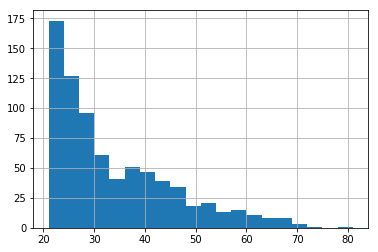

In [17]:
diabetes['Age'].hist(bins=20)

In [18]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [19]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, assigned_group,age_bucket]

In [20]:
#TRAIN TEST SPLIT
x_data = diabetes.drop('Class', axis=1)

In [21]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [23]:
labels = diabetes['Class']

In [24]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels,test_size=.3,random_state=101)

In [27]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,
                                                batch_size=10,num_epochs=1000,
                                                shuffle=True)

In [28]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmparez471m'}


In [29]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\karab\AppData\Local\Temp\tmparez471m\model.ckpt.
INFO:tensorflow:loss = 6.93147, step = 1
INFO:tensorflow:global_step/sec: 250.588
INFO:tensorflow:loss = 9.89701, step = 101 (0.403 sec)
INFO:tensorflow:global_step/sec: 290.346
INFO:tensorflow:loss = 6.7677, step = 201 (0.351 sec)
INFO:tensorflow:global_step/sec: 219.317
INFO:tensorflow:loss = 6.96357, step = 301 (0.456 sec)
INFO:tensorflow:global_step/sec: 282.898
INFO:tensorflow:loss = 3.78946, step = 401 (0.355 sec)
INFO:tensorflow:global_step/sec: 276.293
INFO:tensorflow:loss = 7.17964, step = 501 (0.355 sec)
INFO:tensorflow:global_step/sec: 240.907
INFO:tensorflow:loss = 4.46282, step = 601 (0.425 sec)
INFO:tensorflow:global_step/sec: 267.332
INFO:tensorflow:loss = 5.9355, step = 701 (0.365 sec)
INFO:tensorflow:global_step/sec: 276.342
INFO:tensorflow:loss = 6.19402, step = 801 (0.357 sec)
INFO:tensorflow:global_step/sec: 250.455
INFO

In [30]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,
                                                     batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [31]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-28-23:59:01
INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmparez471m\model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-28-23:59:02
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74026, accuracy_baseline = 0.649351, auc = 0.800329, auc_precision_recall = 0.647479, average_loss = 0.529813, global_step = 1000, label/mean = 0.350649, loss = 5.09945, prediction/mean = 0.380629


In [32]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80032921,
 'auc_precision_recall': 0.64747858,
 'average_loss': 0.52981335,
 'global_step': 1000,
 'label/mean': 0.35064936,
 'loss': 5.0994534,
 'prediction/mean': 0.38062948}

In [33]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,
                                                     num_epochs=1,shuffle=False)

In [34]:
predictions = model.predict(pred_input_func)

In [35]:
my_pred = list(predictions)

INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmparez471m\model.ckpt-1000


In [36]:
my_pred

[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.5326876], dtype=float32),
  'logits': array([ 0.13093722], dtype=float32),
  'probabilities': array([ 0.46731237,  0.5326876 ], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([ 0.6368466], dtype=float32),
  'logits': array([ 0.56170356], dtype=float32),
  'probabilities': array([ 0.36315337,  0.6368466 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.39039013], dtype=float32),
  'logits': array([-0.44567269], dtype=float32),
  'probabilities': array([ 0.6096099 ,  0.39039016], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([ 0.36935407], dtype=float32),
  'logits': array([-0.53498882], dtype=float32),
  'probabilities': array([ 0.63064593,  0.36935407], dtype=float

In [37]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmpcvrn6g_3'}


In [38]:
dnn_model.train(input_fn = input_func, steps=1000)

ValueError: Items of feature_columns must be a _DenseColumn. You can wrap a categorical column with an embedding_column or indicator_column. Given: _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [39]:
embedded_group_col = tf.feature_column.embedding_column(assigned_group,dimension=4)

In [40]:
feat_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree, embedded_group_col, age_bucket]

In [51]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=10000,shuffle=True)

In [52]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\karab\\AppData\\Local\\Temp\\tmprf70xvph'}


In [54]:
dnn_model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmprf70xvph\model.ckpt-1000
INFO:tensorflow:Saving checkpoints for 1001 into C:\Users\karab\AppData\Local\Temp\tmprf70xvph\model.ckpt.
INFO:tensorflow:loss = 5.13398, step = 1001
INFO:tensorflow:global_step/sec: 200.893
INFO:tensorflow:loss = 3.37487, step = 1101 (0.497 sec)
INFO:tensorflow:global_step/sec: 273.464
INFO:tensorflow:loss = 5.52664, step = 1201 (0.355 sec)
INFO:tensorflow:global_step/sec: 291.225
INFO:tensorflow:loss = 1.67055, step = 1301 (0.352 sec)
INFO:tensorflow:global_step/sec: 285.917
INFO:tensorflow:loss = 6.09581, step = 1401 (0.348 sec)
INFO:tensorflow:global_step/sec: 281.431
INFO:tensorflow:loss = 5.14412, step = 1501 (0.365 sec)
INFO:tensorflow:global_step/sec: 233.157
INFO:tensorflow:loss = 7.19391, step = 1601 (0.416 sec)
INFO:tensorflow:global_step/sec: 282.292
INFO:tensorflow:loss = 2.05439, step = 1701 (0.357 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 307.511
INFO:tensorflow:loss = 5.74124, step = 9301 (0.346 sec)
INFO:tensorflow:global_step/sec: 276.703
INFO:tensorflow:loss = 1.62624, step = 9401 (0.350 sec)
INFO:tensorflow:global_step/sec: 292.28
INFO:tensorflow:loss = 4.17309, step = 9501 (0.345 sec)
INFO:tensorflow:global_step/sec: 294.342
INFO:tensorflow:loss = 3.76644, step = 9601 (0.336 sec)
INFO:tensorflow:global_step/sec: 271.822
INFO:tensorflow:loss = 1.96669, step = 9701 (0.375 sec)
INFO:tensorflow:global_step/sec: 289.366
INFO:tensorflow:loss = 0.633705, step = 9801 (0.345 sec)
INFO:tensorflow:global_step/sec: 282.778
INFO:tensorflow:loss = 3.07516, step = 9901 (0.353 sec)
INFO:tensorflow:global_step/sec: 256.837
INFO:tensorflow:loss = 1.52868, step = 10001 (0.386 sec)
INFO:tensorflow:global_step/sec: 276.559
INFO:tensorflow:loss = 2.37495, step = 10101 (0.352 sec)
INFO:tensorflow:global_step/sec: 269.432
INFO:tensorflow:loss = 1.82195, step = 10201 (0.389 sec)
INFO:tensorflow:global_step

In [55]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [56]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-05-29-00:09:35
INFO:tensorflow:Restoring parameters from C:\Users\karab\AppData\Local\Temp\tmprf70xvph\model.ckpt-11000
INFO:tensorflow:Finished evaluation at 2018-05-29-00:09:37
INFO:tensorflow:Saving dict for global step 11000: accuracy = 0.757576, accuracy_baseline = 0.649351, auc = 0.818025, auc_precision_recall = 0.731106, average_loss = 0.816867, global_step = 11000, label/mean = 0.350649, loss = 7.86234, prediction/mean = 0.376865


{'accuracy': 0.75757575,
 'accuracy_baseline': 0.64935064,
 'auc': 0.81802464,
 'auc_precision_recall': 0.73110628,
 'average_loss': 0.8168667,
 'global_step': 11000,
 'label/mean': 0.35064936,
 'loss': 7.8623424,
 'prediction/mean': 0.37686533}